In [40]:
with open('exitletter.txt', 'r',) as file: 
    text = file.read()

# DATA MANAGEMENT/CLEANING

In [41]:
#split sentences into separate lines, all lower case
lines = text.lower().split('\n')

In [42]:
#show me the first 5 lines
lines[0:5]

['bill, dwight, and scott constitute the primary reason for my departure from shell offshore incorporated.  ',
 'their managerial ineptitude reveals the abysmal state of shell management, its petty, secular nativity.  ',
 'these three personify the venal nature of shell and their promotions testify to the fact that this venality is endemic to shell. ',
 'bill took it upon himself to maliciously and noxiously vilify me.',
 'virtually every conversation with him was filled with intimidation. ']

### Use the text_to_word_sequence function from the keras.preprocessing.text library to split the text into a list of words
### By default, the function performs the following operations:
### -Removes all punctuation, including tabs and new lines,  
### -Converts all words to lower case,  
### -Splits the input string into words using space as the separator

In [43]:
from keras.preprocessing.text import text_to_word_sequence
words = text_to_word_sequence(text)

### Use a Tokenizer from the keras.preprocessing.text library to convert the input text into indexed tokens. ie assign each unique word a unique number identifyer

In [44]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(words)
tokens = tokenizer.word_index

In [45]:
# just checking first 5 pairs 
first5pairs = {k: tokens[k] for k in list(tokens)[:5]}
first5pairs

{'to': 1, 'the': 2, 'i': 3, 'and': 4, 'that': 5}

In [46]:
#The vocabulary size is the size of the word-index map plus one. By default, the tokenizer keeps the most common 
#num_words-1 words, based on word frequency.(how many unique words are in the text)

In [47]:
vocabulary_size = len(tokens) + 1 
print(vocabulary_size)

279


In [48]:
# convert lines into sequence of tokesn (sentences made up of number that represent specific words)
sequences = tokenizer.texts_to_sequences(lines)

In [49]:
sequences[0:6]

[[12, 70, 4, 19, 71, 2, 72, 73, 13, 9, 74, 75, 16, 76, 77],
 [25, 35, 78, 79, 2, 80, 81, 6, 16, 82, 83, 84, 85, 86],
 [36,
  37,
  87,
  2,
  88,
  89,
  6,
  16,
  4,
  25,
  90,
  91,
  1,
  2,
  92,
  5,
  17,
  93,
  14,
  94,
  1,
  16],
 [12, 38, 20, 95, 96, 1, 97, 4, 98, 99, 21],
 [39, 26, 100, 22, 40, 7, 101, 22, 102],
 [3,
  7,
  103,
  1,
  104,
  1,
  8,
  26,
  105,
  106,
  6,
  107,
  1,
  41,
  42,
  108,
  109,
  1,
  2,
  110]]

In [50]:
#convert back to text to see what's been done
list_ = [11, 1, 48, 2, 49, 6]
for k, v in tokens.items():    
    if v in list_:
        print(k)

to
the
of
he
time
an


In [51]:
#print the first line for fun
lines[0]

'bill, dwight, and scott constitute the primary reason for my departure from shell offshore incorporated.  '

### Build subsequences of different sizes starting from 1 to the size of sequence.

In [52]:
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)): 
        subsequence = sequence[:i+1] 
        subsequences.append(subsequence)

In [53]:
#print new subsequences to check and confirm what's going on
subsequences[0:6]

[[12, 70],
 [12, 70, 4],
 [12, 70, 4, 19],
 [12, 70, 4, 19, 71],
 [12, 70, 4, 19, 71, 2],
 [12, 70, 4, 19, 71, 2, 72]]

### Use the pad_sequences from the keras.preprocessing.sequences library to pad the subsequences with zeros, so that all sequences are made the same size.
### The padding='pre' parameter tells the function to add padding at the BEGINNING of each sequence.  'post' appends subsequence with zeros after the existing values

In [54]:
from keras.preprocessing.sequence import pad_sequences 
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

In [55]:
sequences[0:6]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 12, 70],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 12, 70,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 12, 70,  4, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 12, 70,  4, 19, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        12, 70,  4, 19, 71,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,

### The input (x)to the network is all the words of the sequence except the last one, and the output (y) is the last word of the sequence.

In [56]:
x, y = sequences[:,:-1],sequences[:,-1]

In [57]:
y[0]

70

In [58]:
#next, convert the output to categorical data (binary ish)
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocabulary_size)

In [59]:
y[0]  #find the 1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
len(y[0]) # each column for one word

279

# Create NN

In [61]:
from keras.models import Sequential 
model = Sequential()

In [62]:
#The input layer is an embedding layer where:   (used to reshape the input vector as batches)

#The input dimension is vocabulary_size
#The output dimension is 100
#The input length is sequence_length - 1

In [63]:
from keras.layers import Embedding
model.add(Embedding(input_dim = vocabulary_size, output_dim = 100, input_length = sequence_length - 1)) 

### First hidden layer is an LSTM (Long Short Term Memory) layer with 100 units

In [64]:
from keras.layers import LSTM 
model.add(LSTM(units = 100))

### The second hidden layer is a dropout layer. 10% dropped out

In [65]:
from keras.layers import Dropout, Dense 
model.add(Dropout(0.1))

### Output layer is a fully-connected layer with the softmax activation func, and the output units are equal to the vocabulary size

In [66]:
model.add(Dense(units=vocabulary_size, activation='softmax'))

### Compiling the RNN (adam optimizer, a categorial_crossentropy loss function, and the accuracy metric)

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 37, 100)           27900     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 279)               28179     
Total params: 136,479
Trainable params: 136,479
Non-trainable params: 0
_________________________________________________________________


In [69]:
#to plot in real time as model runs
import livelossplot
plot_loss_RNN = livelossplot.PlotLossesKeras()

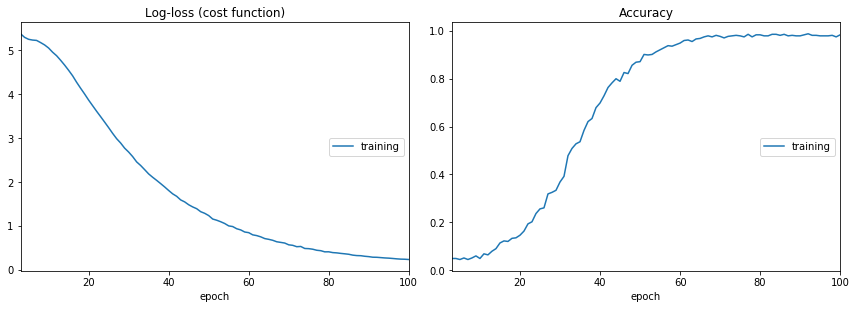

Log-loss (cost function):
training   (min:    0.230, max:    5.629, cur:    0.230)

Accuracy:
training   (min:    0.028, max:    0.987, cur:    0.983)


In [70]:
model.fit(x, y,callbacks = [plot_loss_RNN], epochs = 100) 

In [71]:
#evaluate the model using some strange Qazi code
score = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100)) 

acc: 98.28%


In [72]:
# or this way
loss, score = model.evaluate(x, y, verbose=0)

In [73]:
loss

0.20018759061550273

In [74]:
score*100

98.27586206896551

In [75]:
#how do we truncate all those decimals?